In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

In [270]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [271]:
df["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [273]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [274]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [275]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

No missing or null vlaues

In [276]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [277]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


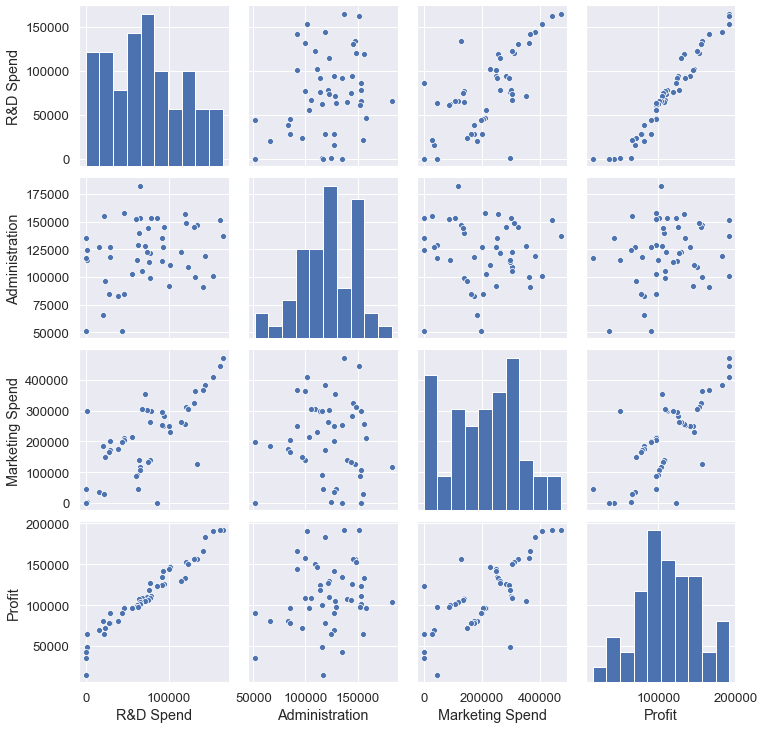

In [278]:
sns.pairplot(df)

There is linear relation between the profit and R&D spend

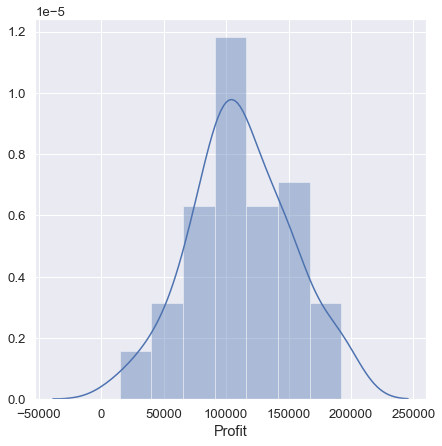

In [279]:
#profit disctribution
sns.distplot(df["Profit"])

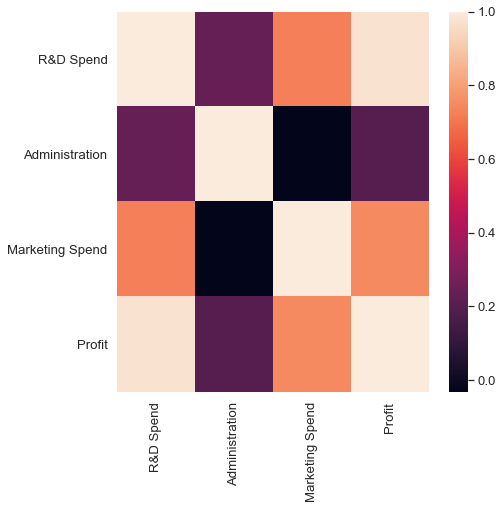

In [280]:
#correlation between features
sns.heatmap(df.corr())

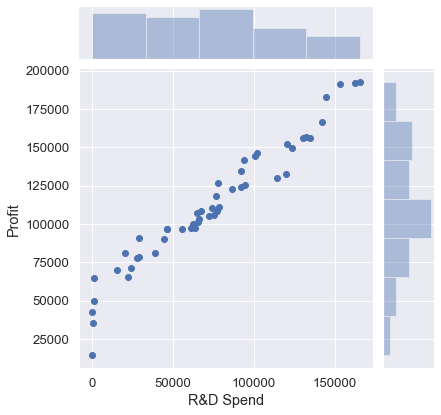

In [281]:
sns.jointplot(x='R&D Spend',y='Profit',data=df)

Adminstration and Marketing spend are in good correlation

In [282]:
#use one hot encoding to get dummies for state categorical coulumn, i think it's important feature
dummies = pd.get_dummies(df["State"])
dummies.head()

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [283]:
df = pd.concat([df,dummies],axis=1)

In [284]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit',
       'California', 'Florida', 'New York'],
      dtype='object')

In [285]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit,California,Florida,New York
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200,0.340000,0.320000,0.340000
std,45902.256482,28017.802755,122290.310726,40306.180338,0.478518,0.471212,0.478518
min,0.000000,51283.140000,0.000000,14681.400000,0.000000,0.000000,0.000000
25%,39936.370000,103730.875000,129300.132500,90138.902500,0.000000,0.000000,0.000000
50%,73051.080000,122699.795000,212716.240000,107978.190000,0.000000,0.000000,0.000000
75%,101602.800000,144842.180000,299469.085000,139765.977500,1.000000,1.000000,1.000000
max,165349.200000,182645.560000,471784.100000,192261.830000,1.000000,1.000000,1.000000


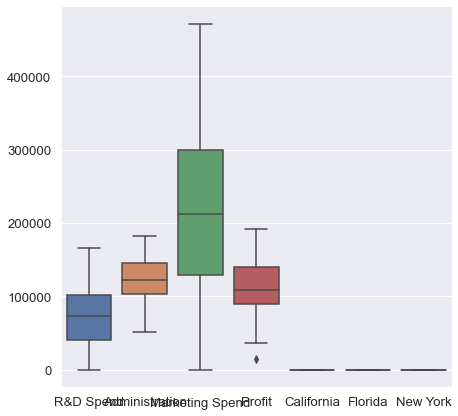

In [286]:
sns.boxplot(data=df)

In [287]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

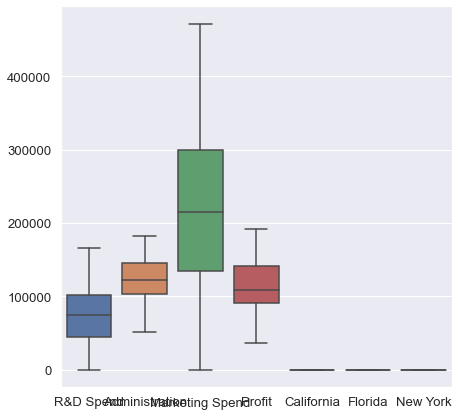

In [288]:
sns.boxplot(data=df)

In [289]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit,California,Florida,New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


In [290]:
y = df['Profit']
df = df[['R&D Spend', 'Administration', 'Marketing Spend', 'California', 'Florida', 'New York']]


In [291]:
from sklearn.preprocessing import MinMaxScaler
#scaling R&D Spend, Marketing Spend cloumns

ms = MinMaxScaler()
new_df = df[ms.fit_transform(df)]
new_df = pd.DataFrame(new_df)

KeyError: "None of [Index([                                 (1.0, 0.6517439310268491, 1.0, 0.0, 0.0, 1.0),\n          (0.9833594598582879, 0.7619717267693455, 0.9408933662664767, 1.0, 0.0, 0.0),\n            (0.927984592607645, 0.3795789541636034, 0.864663603542383, 0.0, 1.0, 0.0),\n          (0.8731364288427159, 0.5129983902549908, 0.8122351304336031, 0.0, 0.0, 1.0),\n           (0.8594377233152625, 0.3053280382623889, 0.776135567095203, 0.0, 1.0, 0.0),\n         (0.7975659997145434, 0.36944789841721865, 0.7691258777055013, 0.0, 0.0, 1.0),\n         (0.8141282812375263, 0.7301611069589005, 0.27071031007615565, 1.0, 0.0, 0.0),\n          (0.7880179039269618, 0.7174572453826598, 0.6864934193416015, 0.0, 1.0, 0.0),\n          (0.7290178603827536, 0.7417327573593728, 0.6604997709757493, 0.0, 0.0, 1.0),\n          (0.7459055139063268, 0.4369288415971631, 0.6464431929774658, 1.0, 0.0, 0.0),\n         (0.6163506082883982, 0.4515063745019315, 0.48573266882033544, 0.0, 1.0, 0.0),\n          (0.6088445544338891, 0.3083642186250832, 0.5293619475518568, 1.0, 0.0, 0.0),\n          (0.5676698163643973, 0.5788355604289264, 0.5295630776874423, 0.0, 1.0, 0.0),\n          (0.5563521928137541, 0.6410656106974888, 0.5355520247503043, 1.0, 0.0, 0.0),\n          (0.7253935307821265, 0.8013271984483843, 0.5437082767308182, 0.0, 1.0, 0.0),\n           (0.692616656143483, 0.5430297340746311, 0.5548644602478126, 0.0, 0.0, 1.0),\n          (0.4718082095347301, 0.5352703611885348, 0.5603115068947851, 1.0, 0.0, 0.0),\n          (0.5724682066801654, 0.7140127290590412, 0.5989483537067062, 0.0, 0.0, 1.0),\n          (0.5548811847895242, 0.4787720110515626, 0.6251155348389232, 0.0, 1.0, 0.0),\n                          (0.522649640881238, 0.7782360434590043, 0.0, 0.0, 0.0, 1.0),\n         (0.46116860559349543, 0.4764236225246156, 0.6330532758522384, 1.0, 0.0, 0.0),\n          (0.4740843620652534, 0.7802101240217711, 0.6353272397268157, 0.0, 0.0, 1.0),\n           (0.447504795910715, 0.5442927284683095, 0.6429196320944263, 0.0, 1.0, 0.0),\n          (0.4084236875654675, 0.4146382960971639, 0.6459919484357357, 0.0, 1.0, 0.0),\n         (0.4659472800594136, 0.36538760476550297, 0.2979642806953435, 0.0, 0.0, 1.0),\n        (0.39107966654812965, 0.6719579313474888, 0.29242744721579217, 1.0, 0.0, 0.0),\n        (0.45557444487182275, 0.7068447734138883, 0.28413435298052653, 0.0, 1.0, 0.0),\n          (0.4360928265755141, 0.5829780693747877, 0.7486132110005403, 0.0, 0.0, 1.0),\n                        (0.39946682536111455, 1.0, 0.2504285328818839, 0.0, 1.0, 0.0),\n         (0.3967692616595665, 0.7745664247050259, 0.22709196855086894, 0.0, 0.0, 1.0),\n       (0.37493063165712326, 0.48992809359023687, 0.19316301672735475, 0.0, 1.0, 0.0),\n          (0.3697410087257755, 0.7720532249634258, 0.1869885610812234, 0.0, 0.0, 1.0),\n         (0.3834845285008939, 0.5932935005308215, 0.09768292318456684, 1.0, 0.0, 0.0),\n        (0.33561668275383244, 0.3941336494866646, 0.45494286475529805, 0.0, 1.0, 0.0),\n        (0.28077589731308045, 0.8100549609241365, 0.44680961058246776, 1.0, 0.0, 0.0),\n         (0.2782838985613477, 0.25703165334499783, 0.4356179871258909, 0.0, 0.0, 1.0),\n        (0.17335287984459555, 0.5768245591090664, 0.42631114528870306, 0.0, 1.0, 0.0),\n                       (0.26652653898537154, 0.0, 0.41762624047737096, 1.0, 0.0, 0.0),\n        (0.1223446499892349, 0.11163611328110429, 0.39269042767655804, 0.0, 0.0, 1.0),\n       (0.23319441521337872, 0.24130912021870482, 0.37093089826469355, 1.0, 0.0, 0.0),\n          (0.17390062969763387, 0.5120407343287374, 0.366260054122214, 1.0, 0.0, 0.0),\n       (0.16869098852610112, 0.25446874380054824, 0.34861435559189047, 0.0, 1.0, 0.0),\n       (0.14297577490547278, 0.34185187818555723, 0.31370516725765024, 1.0, 0.0, 0.0),\n        (0.09377565781993502, 0.5793069281153622, 0.07531871040164347, 0.0, 0.0, 1.0),\n         (0.13412668461655697, 0.788071657023371, 0.06005865818708177, 1.0, 0.0, 0.0),\n       (0.006049197697962857, 0.554724098414143, 0.004035595943144333, 0.0, 0.0, 1.0),\n        (0.007955647804767122, 0.4912597529795813, 0.6297678535584392, 0.0, 1.0, 0.0),\n                                        (0.0, 0.6405468169663746, 0.0, 1.0, 0.0, 0.0),\n                    (0.003278213623047465, 0.0035018386537032375, 0.0, 0.0, 0.0, 1.0)],\n      dtype='object')] are in the [columns]"

In [292]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [293]:
lm = LinearRegression()

In [294]:
lm.fit(x_train,y_train)

LinearRegression()

In [295]:
lm.coef_

array([ 7.87114534e-01,  6.60337776e-04,  2.97347508e-02,  1.86022873e+03,
        6.23466080e+02, -2.48369481e+03])

In [296]:
lm.intercept_

47636.74450071086

In [297]:
y_hat = lm.predict(x_test)
y_hat

array([ 76886.22857082, 115602.60491404, 118473.39920404,  66628.4134903 ,
       129322.06243625, 190779.15866262,  46078.94108652, 115868.69689252,
       118842.78565594,  58206.73050807,  67898.14490565, 160546.25386646,
        75161.56661376, 170263.38067025,  85105.29365901])

In [298]:
y_test

36     90708.19
22    110352.25
20    118474.03
38     81229.06
18    124266.90
1     191792.06
45     64926.08
21    111313.02
16    126992.93
46     49490.75
44     65200.33
7     155752.60
41     77798.83
3     182901.99
39     81005.76
Name: Profit, dtype: float64

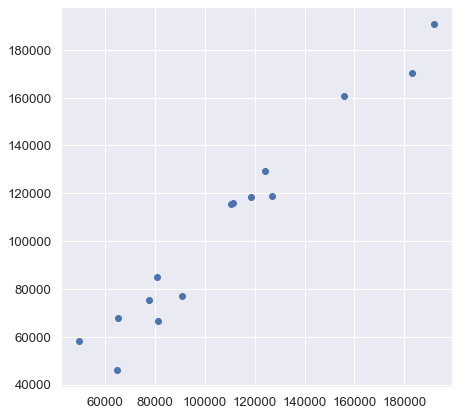

In [299]:
plt.scatter(y_test,y_hat)

In [300]:
lm.score(x_test, y_hat)

1.0

In [301]:
lm.score(x_test, y_hat)

1.0

In [302]:
np.sqrt(mean_squared_error(y_test, y_hat))

8908.75026328539